In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


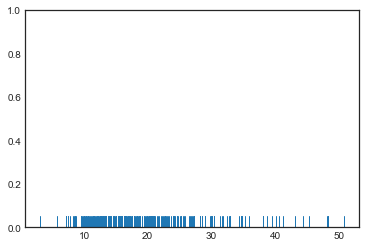

In [5]:
# rugplots make simple plots with ticks for data points
sns.rugplot(tips['total_bill'])

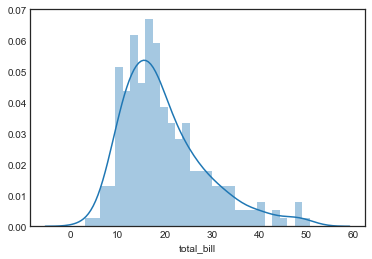

In [6]:
# Histogram + Kernel density estimation 
sns.distplot(tips['total_bill'], bins =30)

# Each spike has a mini distibution plot
# sum all the curves of miniplots

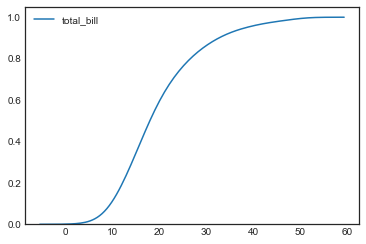

In [7]:
# Cumulative
sns.kdeplot(tips['total_bill'], cumulative=True)

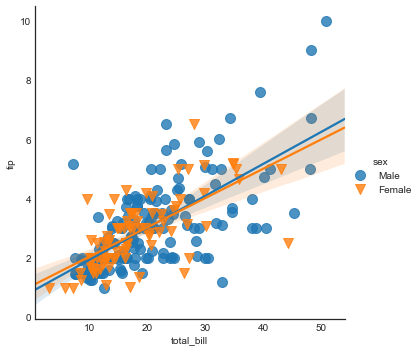

In [8]:
# LM allows to display linear models with seaborn
#markers from matplotlib
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', 
           markers=['o', 'v'], scatter_kws={'s':100})

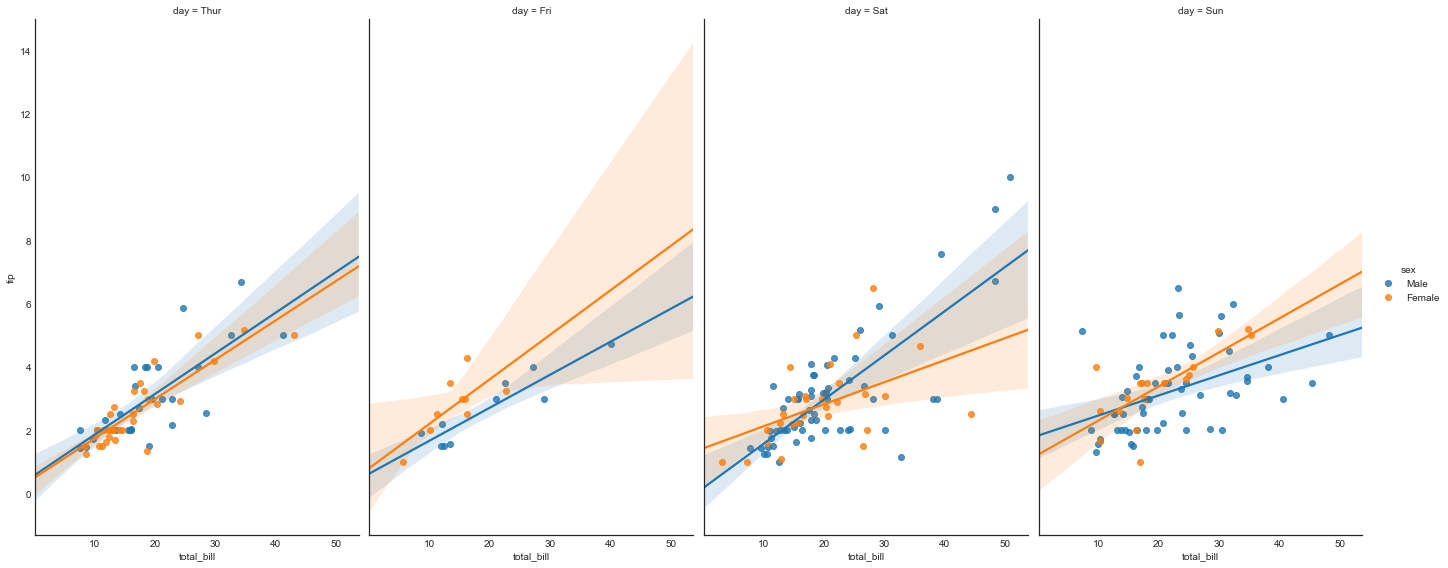

In [9]:
sns.lmplot(x='total_bill', y='tip', data=tips,col='day',hue='sex', aspect=0.6,size=8)

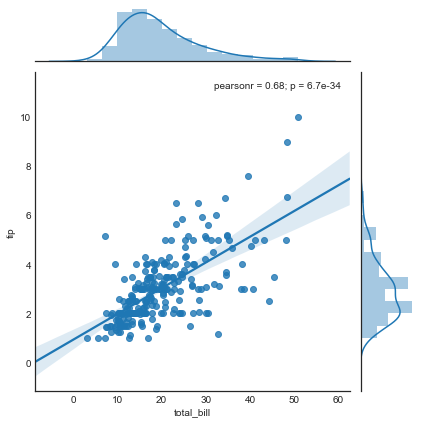

In [12]:
# jointplot links two distplots for bivariate data
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

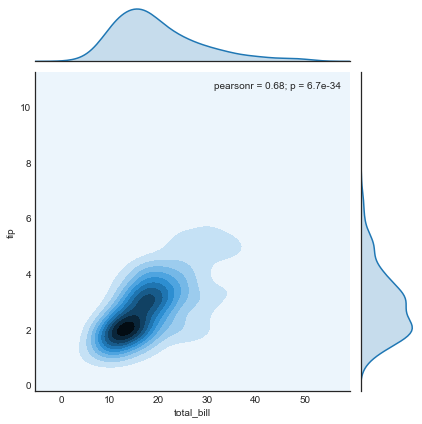

In [9]:
# joinplot links two distplots for bivariate data
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

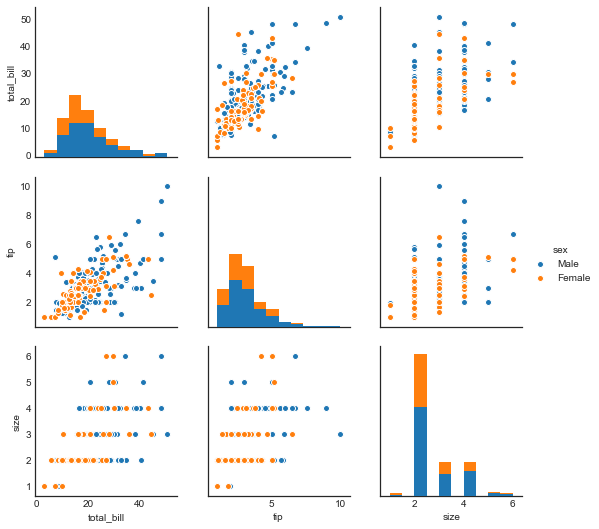

In [10]:
# plots pairs of columns for all columns selected
# supports a hue argument for categorical data
# Great for quickly viewing all comparisons
sns.pairplot(tips, hue='sex')

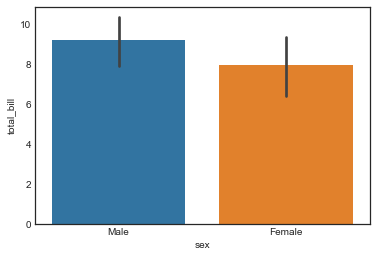

In [11]:
# bar plot
# x is categorical column, y is numerical column
# estimator is an aggregate function, we use numpy std
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

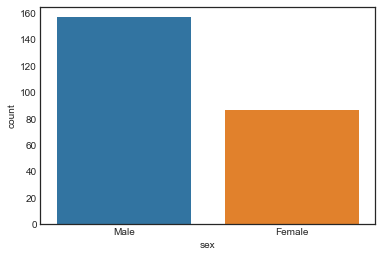

In [11]:
sns.countplot(x='sex', data=tips)

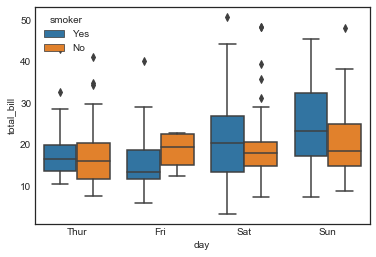

In [13]:
# hue adds a whole new layer of data, in this case smoker
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

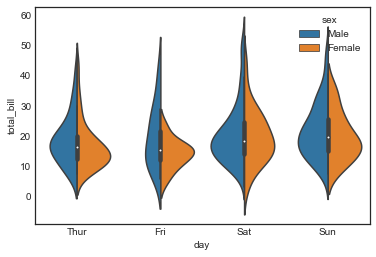

In [14]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

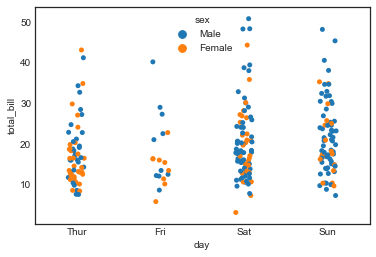

In [15]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex')

In [16]:
# Matrix plots - heatmaps
flights = sns.load_dataset('flights')

In [17]:
# Data should be in matrix form, index and col name has value to bot
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [18]:
# tips.corr(method='pearson', min_periods=1) 
# Compute pairwise corr of columns, excluding NA/null values
tc = tips.corr()
tc.head()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


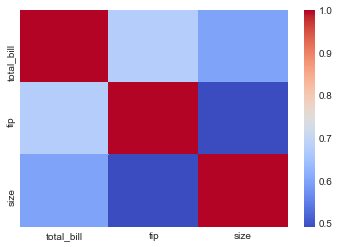

In [19]:
sns.heatmap(tc, cmap='coolwarm')

In [20]:
# Need to pivot_table to take one col to index
fp = flights.pivot_table(index='month', columns='year', values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


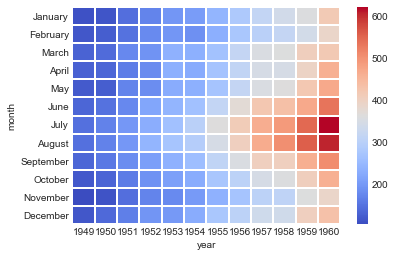

In [21]:
sns.heatmap(fp, cmap='coolwarm', linecolor='white', linewidth=1)

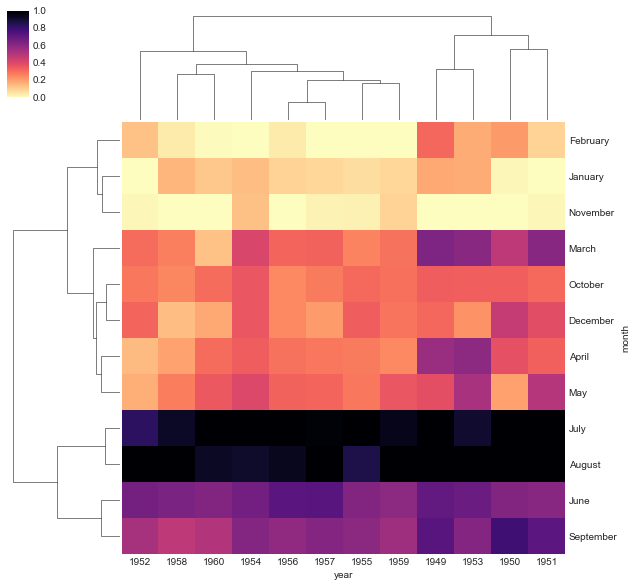

In [22]:
# Looks for similarities in 2d
sns.clustermap(fp, standard_scale=1, cmap='magma_r')

In [23]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


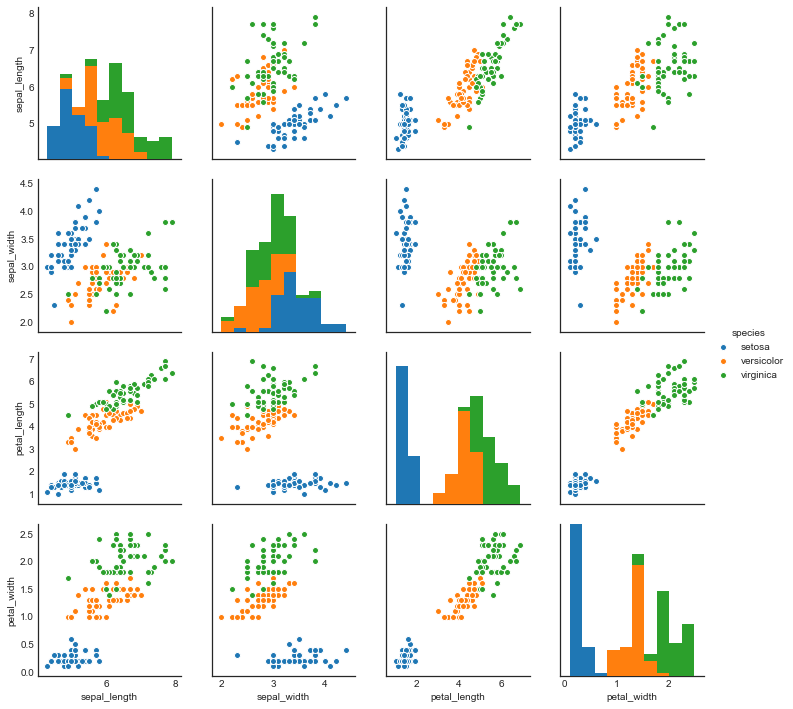

In [24]:
# pairplot choses map/plot types for
sns.pairplot(iris, hue='species')

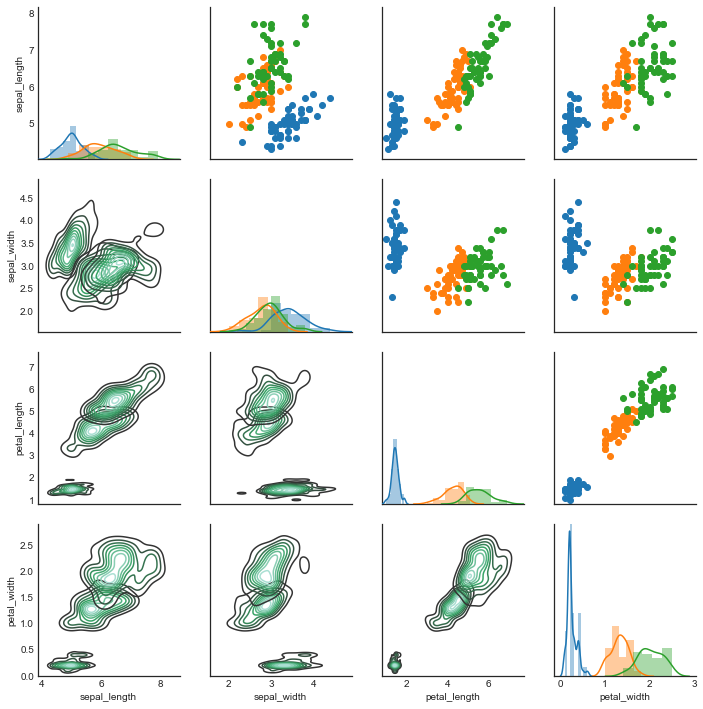

In [25]:
# PairGrid allows u to map plot types
g = sns.PairGrid(iris, hue='species')
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

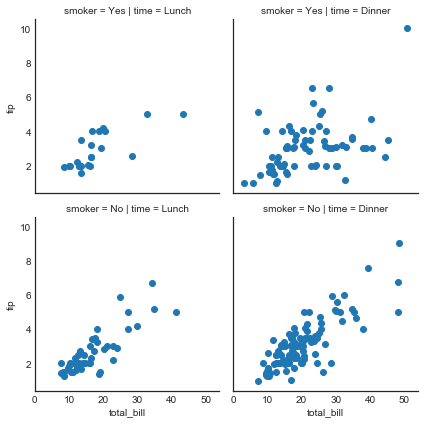

In [26]:
h = sns.FacetGrid(data=tips, col='time',row='smoker')
h.map(plt.scatter,'total_bill','tip')

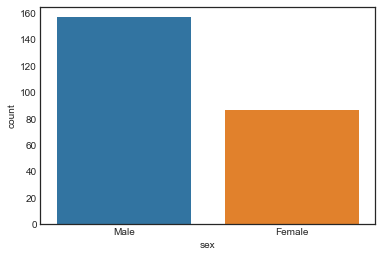

In [27]:
sns.countplot(x='sex',data=tips)

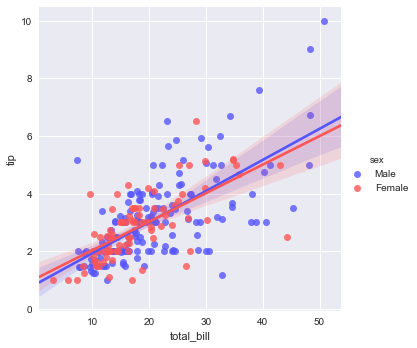

In [36]:
sns.set_context('notebook')
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex',palette='seismic')

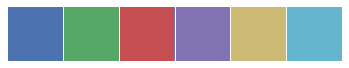

In [28]:
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

current_palette = sns.color_palette()
sns.palplot(current_palette)